In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
%matplotlib inlinehttp://localhost:8888/notebooks/_3_adv_statistics/week3-pca/Workout-1.ipynb#

In [2]:
df = pd.read_csv('./Cancer.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
 df.shape

(699, 11)

In [4]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [6]:
df['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [7]:
df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [8]:
df[df['Bare Nuclei'] == '?']

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [9]:
df[df['Bare Nuclei'] == '?'].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [10]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [11]:
df['Bare Nuclei'].replace('?', '1', inplace=True)
df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [12]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype('int64')

In [13]:
dups = df.duplicated()

In [14]:
df[dups]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
208,1218860,1,1,1,1,1,1,3,1,1,2
253,1100524,6,10,10,2,8,10,7,3,3,4
254,1116116,9,10,10,1,10,8,3,3,1,4
258,1198641,3,1,1,1,2,1,3,1,1,2
272,320675,3,3,5,2,3,10,7,1,1,4
322,733639,3,1,1,1,2,1,3,1,1,2
338,704097,1,1,1,1,1,1,2,1,1,2
561,1321942,5,1,1,1,2,1,3,1,1,2
684,466906,1,1,1,1,2,1,1,1,1,2


In [15]:
dups.sum()

9

In [16]:
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [17]:
df.shape[0]

690

In [18]:
df.corr(method='pearson')

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


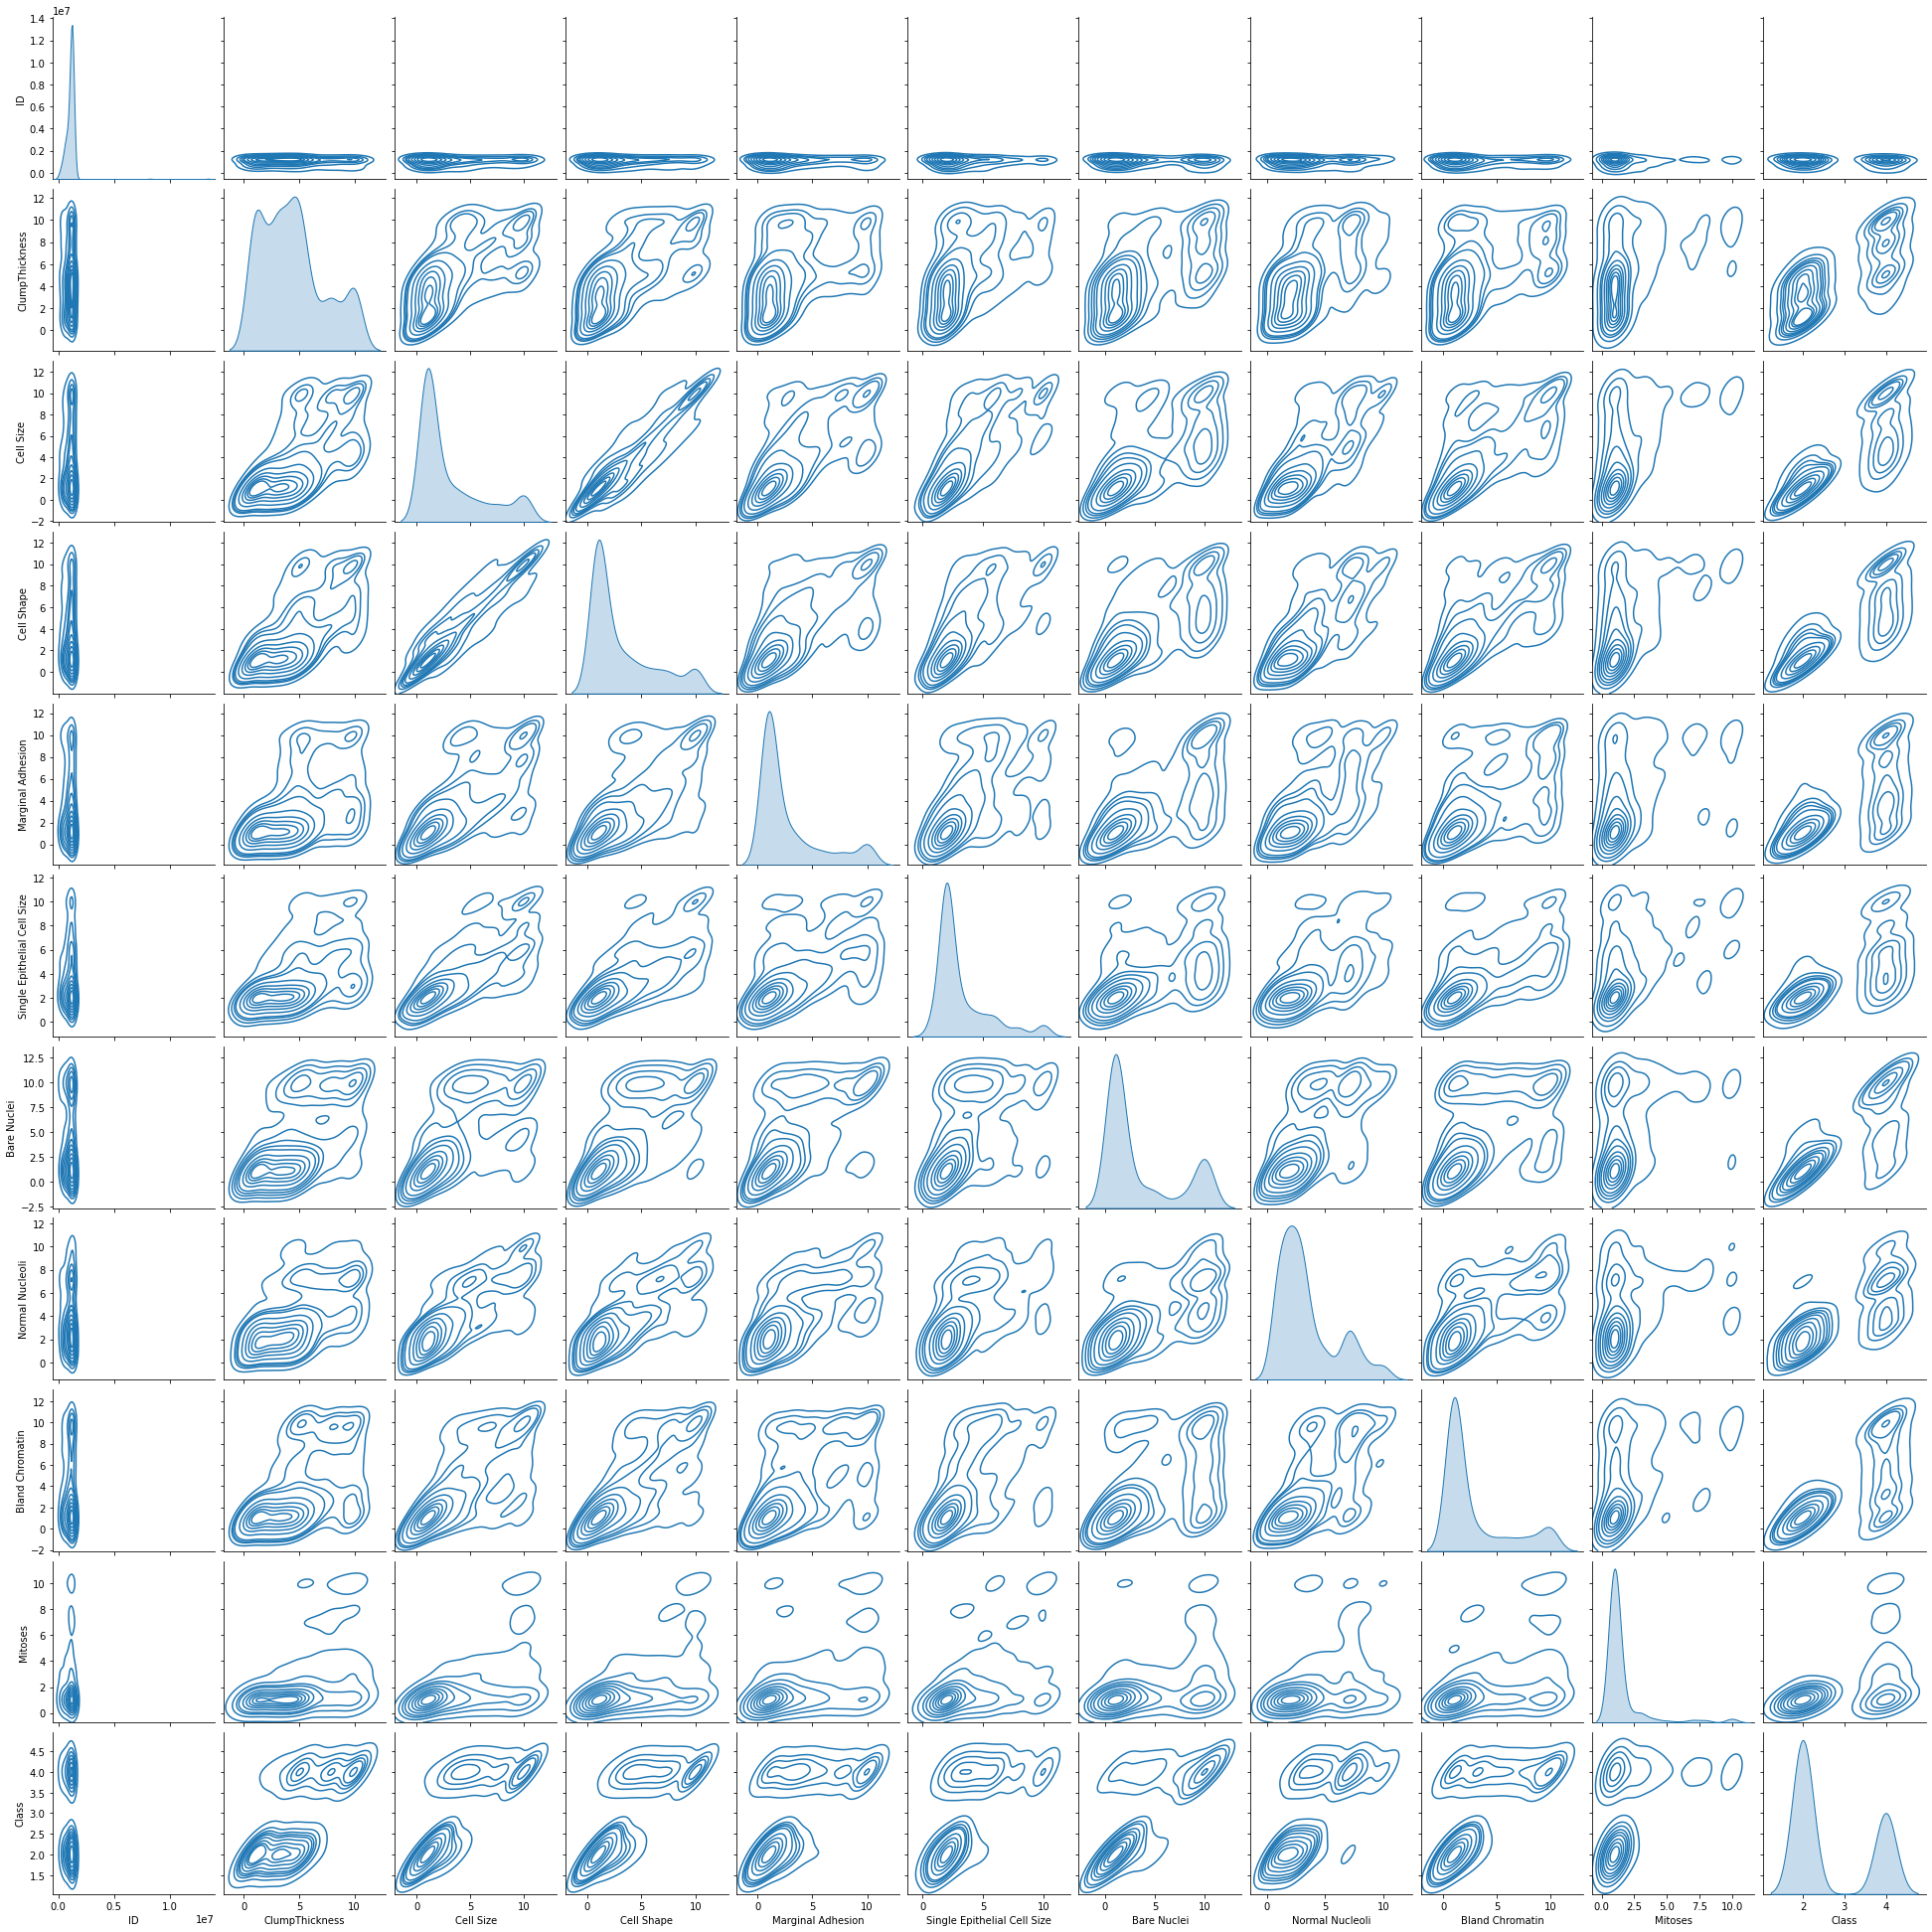

In [19]:
sns.pairplot(df, kind='kde')

<AxesSubplot:>

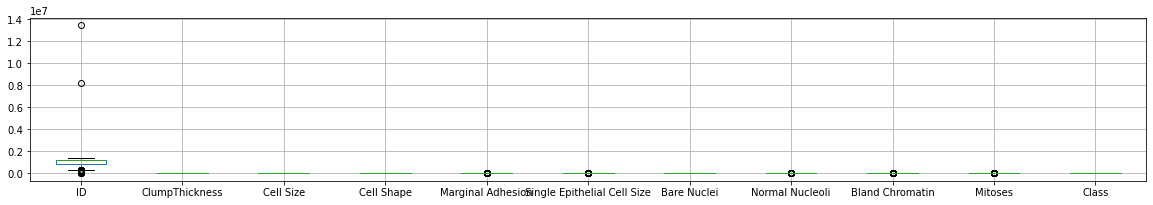

In [20]:
df.boxplot(figsize=(20,3))

In [21]:
pd.crosstab(df['Marginal Adhesion'], df['Class'])

Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [22]:
df['Marginal Adhesion'] = np.where(df['Marginal Adhesion'] > 4, 4, df['Marginal Adhesion'])
df['Marginal Adhesion'].value_counts()

1    400
4    176
3     58
2     56
Name: Marginal Adhesion, dtype: int64

In [23]:
pd.crosstab(df['Single Epithelial Cell Size'], df['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [24]:
from scipy.stats import zscore

data_new = df.apply(zscore)
data_new.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,-0.119195,0.202823,-0.701698,-0.745040,-0.781803,-0.551542,-0.686858,-0.178616,-0.615082,-0.344869,-0.725637
1,-0.114479,0.202823,0.285065,0.268920,1.530101,1.721838,1.803153,-0.178616,-0.288866,-0.344869,-0.725637
2,-0.094323,-0.507572,-0.701698,-0.745040,-0.781803,-0.551542,-0.410190,-0.178616,-0.615082,-0.344869,-0.725637
3,-0.092946,0.558020,1.600748,1.620866,-0.781803,-0.096866,0.143146,-0.178616,1.342211,-0.344869,-0.725637
4,-0.091742,-0.152375,-0.701698,-0.745040,0.759466,-0.551542,-0.686858,-0.178616,-0.615082,-0.344869,-0.725637


<AxesSubplot:>

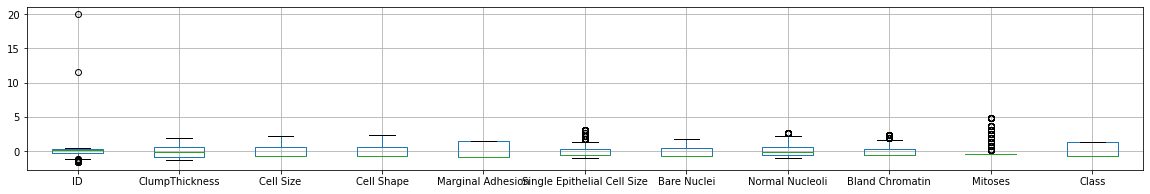

In [25]:
data_new.boxplot(figsize=(20,3))

In [26]:
cov_matrix = np.cov(data_new.T)
cov_matrix

array([[ 1.00145138, -0.05967872, -0.04391921, -0.042865  , -0.06236535,
        -0.04817146, -0.0919656 , -0.05988872, -0.05459618, -0.03633892,
        -0.08019994],
       [-0.05967872,  1.00145138,  0.64410677,  0.65453792,  0.55329897,
         0.51800374,  0.59150555,  0.56187702,  0.53628373,  0.35070402,
         0.71785261],
       [-0.04391921,  0.64410677,  1.00145138,  0.9066632 ,  0.72204998,
         0.74806589,  0.68556472,  0.76073447,  0.7281282 ,  0.46058509,
         0.81877246],
       [-0.042865  ,  0.65453792,  0.9066632 ,  1.00145138,  0.7042574 ,
         0.71527957,  0.70518656,  0.73964761,  0.72557104,  0.44107467,
         0.8187375 ],
       [-0.06236535,  0.55329897,  0.72204998,  0.7042574 ,  1.00145138,
         0.60001951,  0.69693138,  0.68174404,  0.61777172,  0.34344107,
         0.74013583],
       [-0.04817146,  0.51800374,  0.74806589,  0.71527957,  0.60001951,
         1.00145138,  0.58132945,  0.62142658,  0.63480034,  0.48321685,
         0.682

In [27]:
eigen_values, eigen_vecs = np.linalg.eig(cov_matrix)
eigen_values
eigen_vecs

array([[-0.03193106, -0.99306872, -0.07811473,  0.04591273, -0.00131444,
         0.00353869,  0.05243982,  0.01028976,  0.02501816,  0.01685906,
         0.02836946],
       [ 0.28801106,  0.01383775, -0.11078349,  0.78182351, -0.02673104,
        -0.17265983, -0.42202676, -0.00557943,  0.2258983 , -0.17514251,
        -0.05448439],
       [ 0.35439167, -0.04621728,  0.00458161, -0.1408269 , -0.74036989,
         0.00107221, -0.181838  , -0.12445341, -0.45009399, -0.00720852,
        -0.23038728],
       [ 0.3516597 , -0.04324124, -0.02806952, -0.08270568,  0.64817972,
        -0.19278517, -0.18445461, -0.08268465, -0.58527853,  0.05413756,
        -0.1522904 ],
       [ 0.31567066,  0.01031399, -0.19568141, -0.10509371,  0.04572758,
        -0.01490161,  0.45462274,  0.01395073,  0.07260643, -0.7930684 ,
        -0.08655087],
       [ 0.30934386, -0.04335516,  0.22384609, -0.30071781,  0.06459171,
        -0.01581411, -0.20402455, -0.70991134,  0.40459599, -0.0051422 ,
         0.219